In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import pprint

In [2]:
dataset= pd.read_csv("sizekorea2010.csv")

In [62]:
x = dataset.iloc[:, [2, 4, 7, 15, 17, 18, 19, 20, 22]].values
x_origin = x
x = normalize(x, norm='max', axis=0)
x_train, x_test = train_test_split(x,test_size=0.2, random_state=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


In [46]:
print(x_origin)
print(x)

[[1330  349  239 ...,  454  386  199]
 [1160  295  198 ...,  380  315  142]
 [1243  322  216 ...,  400  332  154]
 ..., 
 [1584  422  348 ...,  562  475  257]
 [1606  414  336 ...,  558  483  212]
 [1668  426  331 ...,  560  475  225]]
[[ 0.6873385   0.61335677  0.55196305 ...,  0.66374269  0.65870307
   0.48067633]
 [ 0.5994832   0.51845343  0.45727483 ...,  0.55555556  0.53754266
   0.34299517]
 [ 0.64237726  0.5659051   0.49884527 ...,  0.58479532  0.5665529
   0.37198068]
 ..., 
 [ 0.81860465  0.74165202  0.80369515 ...,  0.82163743  0.8105802
   0.62077295]
 [ 0.82997416  0.72759227  0.77598152 ...,  0.81578947  0.82423208
   0.51207729]
 [ 0.8620155   0.7486819   0.76443418 ...,  0.81871345  0.8105802
   0.54347826]]


In [63]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x_train)

In [68]:
x_train_2d = TSNE().fit_transform(x_train)

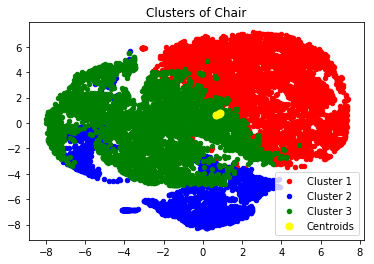

In [69]:
plt.scatter(x_train_2d[y_kmeans == 0, 0], x_train_2d[y_kmeans == 0, 1], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(x_train_2d[y_kmeans == 1, 0], x_train_2d[y_kmeans == 1, 1], s = 20, c = 'blue', label = 'Cluster 2')
plt.scatter(x_train_2d[y_kmeans == 2, 0], x_train_2d[y_kmeans == 2, 1], s = 20, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Chair')
plt.legend()
plt.show()

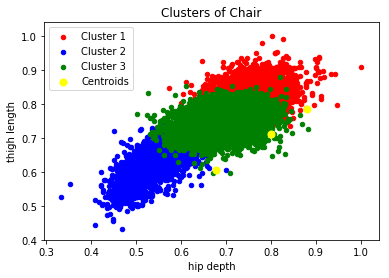

In [70]:
plt.scatter(x_train[y_kmeans == 0, 2], x_train[y_kmeans == 0, 7], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(x_train[y_kmeans == 1, 2], x_train[y_kmeans == 1, 7], s = 20, c = 'blue', label = 'Cluster 2')
plt.scatter(x_train[y_kmeans == 2, 2], x_train[y_kmeans == 2, 7], s = 20, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Chair')
plt.xlabel('hip depth')
plt.ylabel('thigh length')
plt.legend()
plt.show()

In [1]:
var_series = [5, 2, 7, 3]
for cluster_id in range(3):
    for var_id in var_series:
        print('Cluster: ', cluster_id, ', Var No.:', var_id)
        print('max: ',max(x_origin[:, var_id])*max(x_train[y_kmeans == cluster_id, var_id]))
        print('min: ',max(x_origin[:, var_id])*min(x_train[y_kmeans == cluster_id, var_id]))

Cluster:  0 , Var No.: 5


NameError: name 'x_origin' is not defined